In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],  # "Times", "Palatino", "New Century Schoolbook", "Bookman", 
    })
from mpl_toolkits.mplot3d import Axes3D
import os
import torch
master_dir = os.path.abspath("../")
master_dir

'D:\\Coding\\master-thesis-AI'

Font hyperparameters

In [17]:
fontsize_3 = 25 # fontsize when we have 3 subfigures
fontsize_2 = 18 # fontsize when we have 2 subfigures

# Illustration of perceptron & linear regression

## Linear regression

In [11]:
def linear_func(x, w = 2, b = 3):
    return w*x+b

In [12]:
def linear_regression(x, y):
    """Russell and Norvig page 695"""
    N = len(x)
    w = (N * np.dot(x, y) - np.sum(x) * np.sum(y))/(N * np.sum(x**2) - np.sum(x)**2)
    b = (np.sum(y) - w * np.sum(x))/N
    
    return w, b

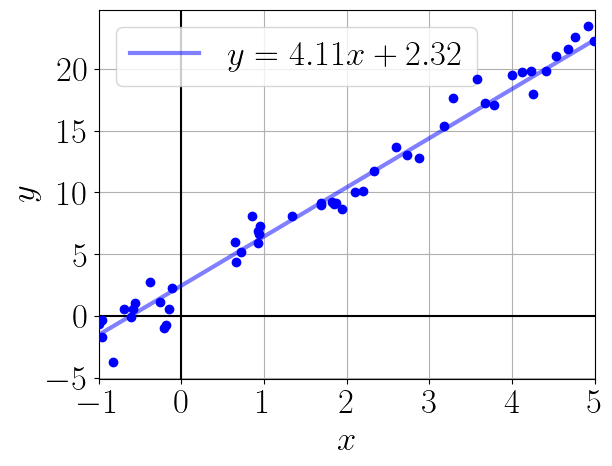

In [13]:
# Plot hyperparams
WTRUE=3.98451
BTRUE=2.45132
alpha=0.5

# True function
xmin = -1
xmax = 5
xvals = np.arange(xmin, xmax, 0.01)
yvals = linear_func(xvals, w=WTRUE, b=BTRUE)

# Training data
n_samples = 50
xsamples = np.random.uniform(low=xmin, high=xmax, size=n_samples)
sigma = 1.2
ysamples = linear_func(xsamples, w=WTRUE, b=BTRUE) + sigma * np.random.randn(n_samples)

# Get solution 
w_sol, b_sol = linear_regression(xsamples, ysamples)

# Plot true and samples
plt.plot(xvals, yvals, color = "blue", lw=3, alpha=alpha, label = r"$y = {0:.2f}x + {1:.2f}$".format(w_sol, b_sol), zorder=100)
plt.scatter(xsamples, ysamples, color="blue", zorder=100)
# Make plot nice
plt.grid()
plt.legend(fontsize=fontsize_3)
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.xlim(xmin, xmax)
plt.xticks(fontsize=fontsize_3)
plt.yticks(fontsize=fontsize_3)
plt.xlabel(r"$x$", fontsize=fontsize_3)
plt.ylabel(r"$y$", fontsize=fontsize_3)
plt.savefig(os.path.join(master_dir, "Plots/Final/illustration_linear_regression.pdf"), bbox_inches='tight')
plt.show()

## Loss landscape

Now to plot the loss landscape:

In [14]:
def loss(x, y, w, b):
    """MSE loss function"""
    preds = w*x + b
    diffs = preds - y
    return np.mean(diffs**2)

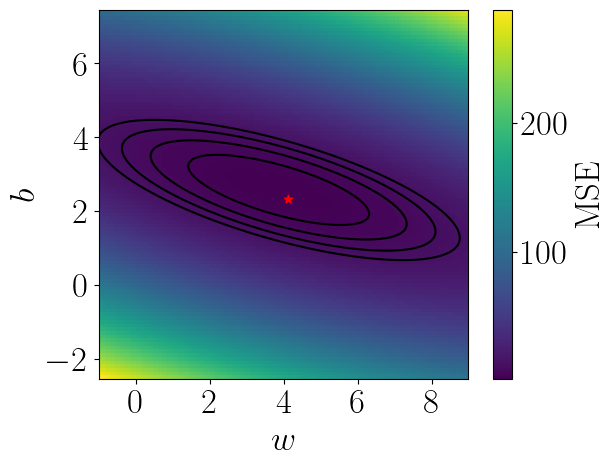

In [15]:
# Define the range of values for w and b
width_w = 5
width_b = 5
n_points = 100
w_vals = np.linspace(WTRUE-width_w, WTRUE+width_w, n_points)
b_vals  = np.linspace(BTRUE-width_b, BTRUE+width_b, n_points)

# Create a meshgrid of the range of values for w and b
W, B = np.meshgrid(w_vals, b_vals)

Z = np.zeros_like(W)
for i, w in enumerate(w_vals):
    for j, b in enumerate(b_vals):
        loss_val = loss(xsamples.copy(), ysamples.copy(), w, b)
        Z[i, j] = loss_val

# Create the heatmap
fig, ax = plt.subplots()
im = ax.imshow(Z, cmap='viridis', extent=[w_vals.min(), w_vals.max(), b_vals.min(), b_vals.max()], origin='lower')

# Add a colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label("MSE", fontsize=fontsize_3)
# Add contour lines
contour_levels = np.linspace(Z.min(), Z.max()//20, 5)
contours = ax.contour(W, B, Z, levels=contour_levels, colors='black')

ax.scatter(w_sol, b_sol, color="red", marker="*")
cbar.ax.tick_params(labelsize=fontsize_3)

# Set the axis labels and title
ax.set_xlabel(r'$w$', fontsize=fontsize_3)
ax.set_ylabel(r'$b$', fontsize=fontsize_3)
plt.xticks(fontsize=fontsize_3)
plt.yticks(fontsize=fontsize_3)
plt.savefig(os.path.join(master_dir, "Plots/Final/illustration_linear_regression_weights.pdf"), bbox_inches='tight')
plt.show()

## Loss landscape in 3D

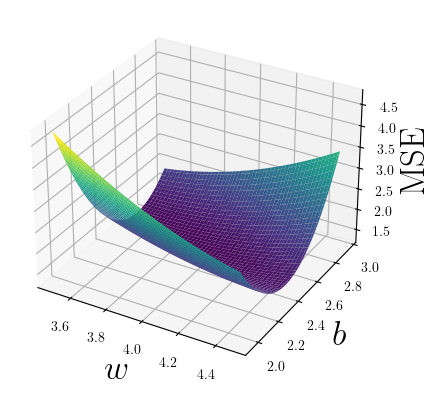

In [17]:
# Define the range of values for w and b
width_w = 0.5
width_b = 0.5
n_points = 100
w_vals = np.linspace(WTRUE-width_w, WTRUE+width_w, n_points)
b_vals  = np.linspace(BTRUE-width_b, BTRUE+width_b, n_points)

# Create a meshgrid of the range of values for w and b
W, B = np.meshgrid(w_vals, b_vals)

Z = np.zeros_like(W)
for i, w in enumerate(w_vals):
    for j, b in enumerate(b_vals):
        loss_val = loss(xsamples.copy(), ysamples.copy(), w, b)
        Z[i, j] = loss_val

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(W, B, Z, cmap='viridis', alpha = 1)

# Plot location of the solution (not so clear, don't do it)
# loss_sol = loss(xsamples, ysamples, w_sol, b_sol)
# ax.scatter(w_sol, b_sol, loss_sol, color="red", marker="*", s=50, zorder=1000)

# Set the axis labels and title
ax.set_xlabel(r'$w$', fontsize=fontsize_3)
ax.set_ylabel(r'$b$', fontsize=fontsize_3)
ax.set_zlabel(r'MSE', fontsize=fontsize_3, rotation=90)
plt.savefig(os.path.join(master_dir, "Plots/Final/illustration_linear_regression_weights_3D.pdf"), bbox_inches='tight')
plt.show()

# MLP visualization

In [97]:
def func(x):
    return np.sin(5/x) * np.exp(0.01 * x)

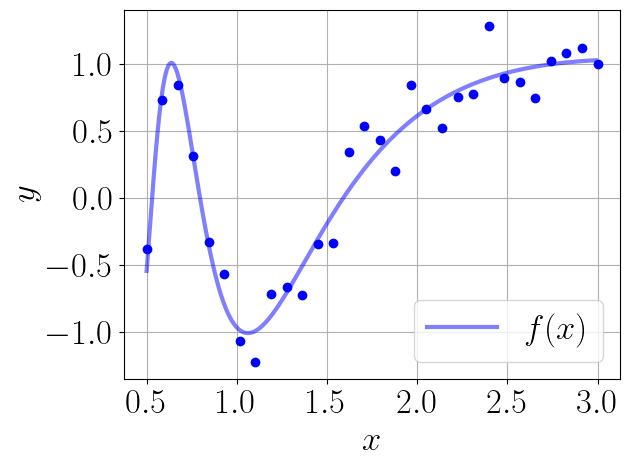

In [107]:
xmin = 0.5
xmax = 3

xvals = np.arange(xmin, xmax, 0.01)
s = 0.2
yvals = func(xvals) 

n_samples = 30
xsamples = np.linspace(xmin, xmax, n_samples)
# xsamples = np.random.uniform(xmin, xmax, n_samples)
ysamples = func(xsamples) + s*np.random.randn(n_samples)

# Plot true and samples
plt.plot(xvals, yvals, '-', color="blue", label = r"$f(x)$", lw=3, alpha = alpha, zorder=100)
plt.scatter(xsamples, ysamples, color="blue", zorder=100)

plt.xlabel(r"$x$", fontsize=fontsize_3)
plt.ylabel(r"$y$", fontsize=fontsize_3)
plt.legend(fontsize=fontsize_3)
plt.xticks(fontsize=fontsize_3)
plt.yticks(fontsize=fontsize_3)
plt.grid()
plt.savefig(os.path.join(master_dir, "Plots/Final/illustration_MLP_nonlinear.pdf"), bbox_inches = 'tight')
plt.show()

# Tabulated EOS visualizations

In [3]:
eos_table_loc = "D:\Coding\Datasets/eos_tables/SLy4_0000_rho391_temp163_ye66.h5"

In [4]:
import h5py

In [39]:
fontsize_t = 20
fontsize_3 = 30

In [40]:
with h5py.File(eos_table_loc, 'r') as f:
    # Input vars
    logrho = f["logrho"][:]
    logtemp = f["logtemp"][:]
    ye = f["ye"][:]
    
    # Output vars
    logenergy = f["logenergy"][:]
    logpress = f["logpress"][:]
    cs2 = f["cs2"][:]

In [41]:
logenergy.shape

(66, 163, 391)

In [42]:
points = []
step = 20
sub_logrho = logrho[0:-1:step]
sub_logtemp = logtemp[0:-1:step]
sub_ye = ye[0:-1:step]
sub_logenergy = []
sub_logpress = []
sub_cs2 = []
points = []

for i, r in enumerate(sub_logrho):
    rho_index = step * i
    for j, t in enumerate(sub_logtemp):
        temp_index = step * j
        for k, y in enumerate(ye[0:-1:step]):
            ye_index = step * k
            points.append([r, t, y])
            # Finally, also add the col valas
            sub_logenergy.append([logenergy[ye_index, temp_index, rho_index]])
            sub_logpress.append([logpress[ye_index, temp_index, rho_index]])
            sub_cs2.append([cs2[ye_index, temp_index, rho_index]])

points = np.array(points)

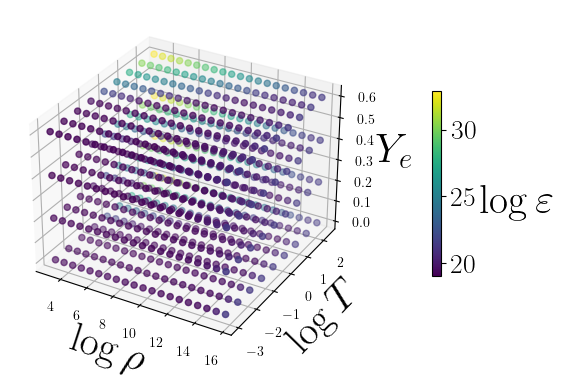

In [48]:
# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=sub_logenergy) 

# Set the axis labels and title
ax.zaxis.set_rotate_label(False)  # disable automatic rotation
ax.set_xlabel(r'$\log\rho$', fontsize=fontsize_3)
ax.set_ylabel(r'$\log T$', fontsize=fontsize_3)
ax.set_zlabel(r'$Y_e$', fontsize=fontsize_3)
cbar = fig.colorbar(sc, pad=0.15, shrink = 0.5)
cbar.ax.set_ylabel(r"$\log\varepsilon$", fontsize=fontsize_3,rotation=0)
cbar.ax.tick_params(labelsize=fontsize_t)
cbar.ax.yaxis.labelpad = 30
plt.savefig(os.path.join(master_dir, "Plots/Final/illustration_eos_table_logenergy.pdf"), bbox_inches='tight')
plt.show()

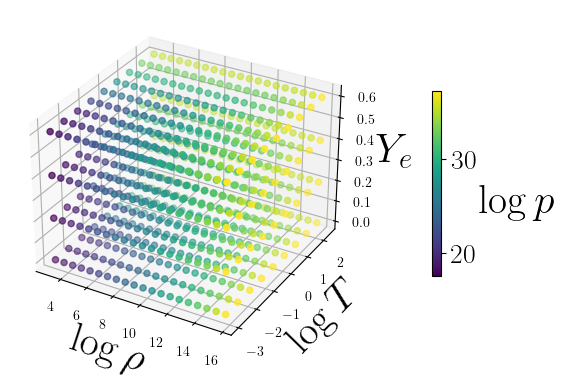

In [49]:
# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=sub_logpress) 

# Set the axis labels and title
ax.zaxis.set_rotate_label(False)  # disable automatic rotation
ax.set_xlabel(r'$\log\rho$', fontsize=fontsize_3)
ax.set_ylabel(r'$\log T$', fontsize=fontsize_3)
ax.set_zlabel(r'$Y_e$', fontsize=fontsize_3, rotation=0)
cbar = fig.colorbar(sc, pad=0.15, shrink = 0.5)
cbar.ax.set_ylabel(r"$\log p$", fontsize=fontsize_3, rotation=0)
cbar.ax.tick_params(labelsize=fontsize_t)
cbar.ax.yaxis.labelpad = 30
plt.savefig(os.path.join(master_dir, "Plots/Final/illustration_eos_table_logpress.pdf"), bbox_inches='tight')
plt.show()

In [35]:
c_cgs = 2.99792458e10 # speed of light in m/s

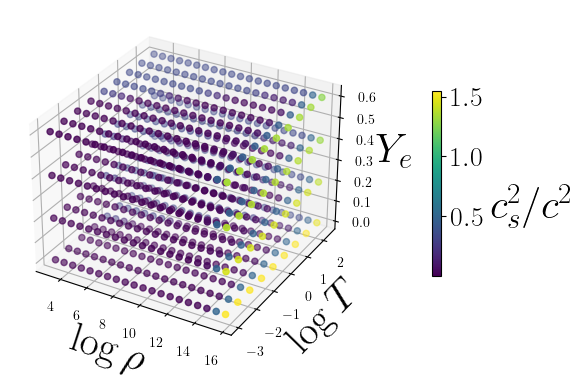

In [54]:
# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=np.array(sub_cs2)/(c_cgs**2)) 

# Set the axis labels and title
ax.zaxis.set_rotate_label(False)  # disable automatic rotation
ax.set_xlabel(r'$\log\rho$', fontsize=fontsize_3)
ax.set_ylabel(r'$\log T$', fontsize=fontsize_3)
ax.set_zlabel(r'$Y_e$', fontsize=fontsize_3)
cbar = fig.colorbar(sc, pad=0.15, shrink = 0.5)
cbar.ax.set_ylabel(r"$c_s^2/c^2$", fontsize=fontsize_3, rotation=0)
cbar.ax.tick_params(labelsize=fontsize_t)
cbar.ax.yaxis.labelpad = 35
plt.savefig(os.path.join(master_dir, "Plots/Final/illustration_eos_table_cs2.pdf"), bbox_inches='tight')
plt.show()

# Optimal neuron to prune

In [4]:
import pandas as pd

In [5]:
optimal_original = pd.read_csv("../Data/optimal_neuron_to_prune_original.csv")
optimal_pruned = pd.read_csv("../Data/optimal_neuron_to_prune_pruned.csv")

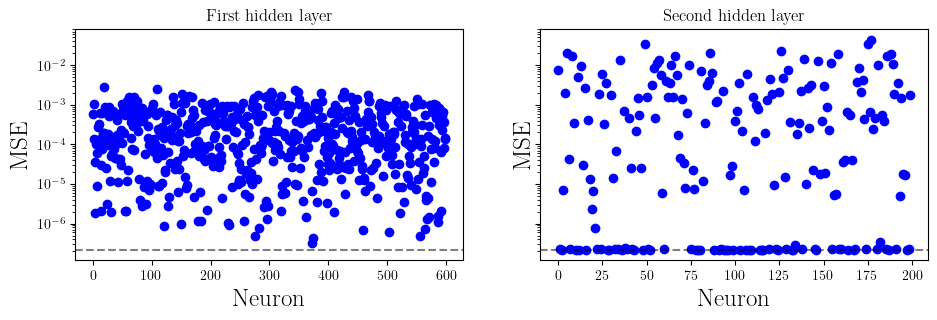

In [20]:
df = optimal_original

fig, axs = plt.subplots(1, 2, figsize = (11,3), sharey=True)
titles = ["First hidden layer", "Second hidden layer"]

for i, ax in enumerate(axs):
    layer_vals = df[df["layer_index"] == i+1]
    neurons = layer_vals["neuron_index"]
    mse = layer_vals["l2_norm"]
    
    baseline = 2.19e-7
    
    ax.scatter(neurons, mse,  color="blue")
    plt.grid()
    ax.axhline(baseline, ls="--", color="black", alpha=0.5)
    ax.set_xlabel(r"Neuron", fontsize=fontsize_2)
    ax.set_ylabel(r"MSE", fontsize=fontsize_2)
    ax.set_yscale('log')
    ax.set_title(titles[i])
plt.savefig("../Plots/Final/optimal_neuron_to_prune_original.pdf")
plt.show()

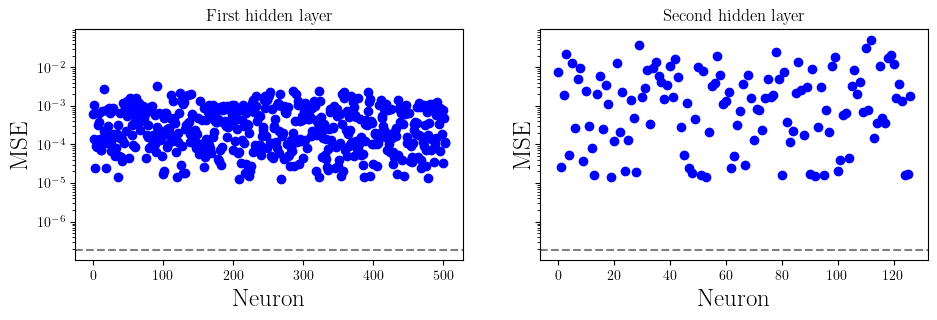

In [22]:
df = optimal_pruned

fig, axs = plt.subplots(1, 2, figsize = (11,3), sharey=True)
titles = ["First hidden layer", "Second hidden layer"]

for i, ax in enumerate(axs):
    layer_vals = df[df["layer_index"] == i+1]
    neurons = layer_vals["neuron_index"]
    mse = layer_vals["l2_norm"]
    
    baseline = 1.88e-7
    
    ax.scatter(neurons, mse,  color="blue")
    plt.grid()
    ax.axhline(baseline, ls="--", color="black", alpha=0.5)
    ax.set_xlabel(r"Neuron", fontsize=fontsize_2)
    ax.set_ylabel(r"MSE", fontsize=fontsize_2)
    ax.set_yscale('log')
    ax.set_title(titles[i])
plt.savefig("../Plots/Final/optimal_neuron_to_prune_pruned.pdf")
plt.show()